In [253]:
#https://github.com/y-bar/ml-based-anomaly-detection/blob/master/notebook/example-01.ipynb
#https://towardsdatascience.com/stl-decomposition-how-to-do-it-from-scratch-b686711986ec
#https://medium.com/@richa.mishr01/anomaly-detection-in-seasonal-time-series-where-anomalies-coincide-with-seasonal-peaks-9859a6a6b8ba

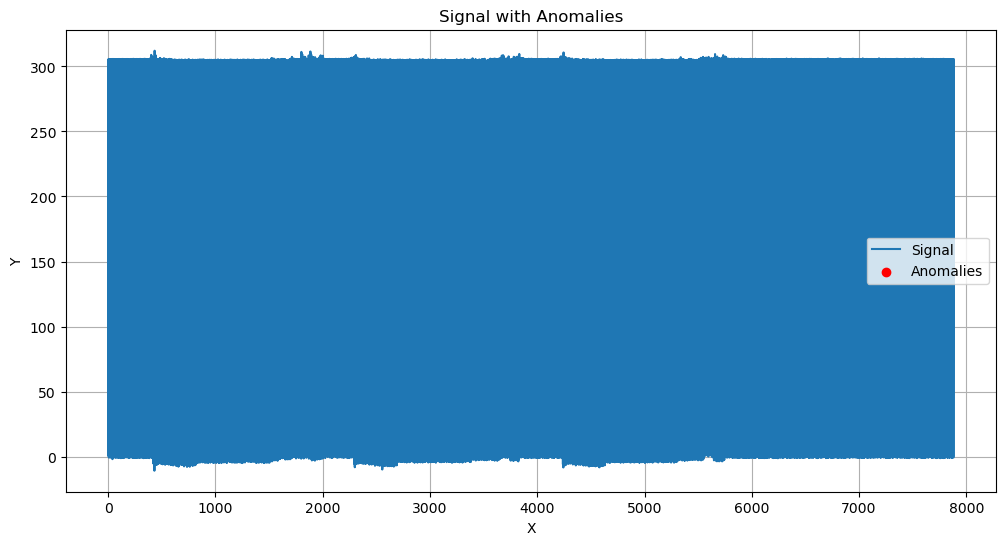

(array([], dtype=int64),)

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sine signal with some outliers
np.random.seed(42)
x = np.linspace(0, 50, 100)
y = np.sin(x) + np.random.normal(scale=0.1, size=len(x))
y=df['Value'].values
x=df['Value'].index
# Add some outliers
y[20] = 2
y[40] = -2

# Compute mean and standard deviation
mean_y = np.mean(y)
std_y = np.std(y)

# Compute Z-score
z_score = (y - mean_y) / std_y

# Find anomalies
anomalies = np.where(np.abs(z_score) > 3)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(x, y, label='Signal')
plt.scatter(x[anomalies], y[anomalies], color='red', label='Anomalies')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Signal with Anomalies')
plt.grid(True)
plt.show()

anomalies


In [ ]:
y

In [ ]:
df['Value'].values

In [ ]:
#pip install sranodec
#!pip install numpy==1.21.1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sranodec as anom
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import statistics
import pandas as pd
from scipy.stats import entropy
from math import log, e

#from kats.tsfeatures.tsfeatures import TsFeatures as tsf
from scipy.signal import periodogram,welch
from tqdm import tqdm
#from neuralprophet import NeuralProphet, set_log_level
#set_log_level("ERROR")
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
#import seaborn as sns
import matplotlib.pyplot as plt

import pickle
from scipy.stats import entropy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib
import random
import matplotlib.transforms as mtransforms
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

from numpy.fft import rfft, irfft, rfftfreq
from scipy import pi, signal, fftpack
#sns.set(style="darkgrid")
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

In [3]:
 #pip install sranodec matplotlib scipy sns statsmodels pickle

In [36]:
#data_location = "C:\Users\User\Desktop\Udemy Course\Anomaly detection TS"
#df = pd.read_csv(data_location + "export_ED250_GE10 81122 - 4 wochen_v2.csv")

#df = pd.read_csv(data_location + "GE10_30-31-01-23-DK IoT Sensor (Export) v5.csv")
#df = pd.read_csv(data_location + "export_ED250_GE10 81122 - 4 wochen_with_anomalies.csv")
#X, y = df.iloc[:, 3:-5], df.iloc[:, -4]
#X, y = df.iloc[:, 3:-5], df.iloc[:, 5:-3]
#df = pd.read_csv('C:/Users/hotaha/OneDrive - dormakaba Group/Desktop/Python/LOF dbscan anomaly detection clustering/data_export_ED_020823_gegenwind.csv')
#df = pd.read_csv('C:/Users/hotaha/OneDrive - dormakaba Group/Desktop/Python/LOF dbscan anomaly detection clustering/data_export_ED_020823_keine volle oeffnung.csv')
df = pd.read_csv('C:/Users/User/Desktop/Udemy Course/Anomaly detection TS/data_sensor.csv')

####normal
#df = pd.read_csv('C:/Users/hotaha/OneDrive - dormakaba Group/Desktop/Python/LOF dbscan anomaly detection clustering/data_export_ED_020823_normal.csv')


#X=X[0:10080]
#y=y[0:10080]
#df_new=df.iloc[:, 3:-3]
#df_new=df_new[:10080]
#df=df[:10080]
#df=df[df['Fehlersimulation']!='Widerstand_Last'] #& df['Fehlersimulation']!= 'Keine volle Oeffnung']
#df=df[df['Fehlersimulation']!='Keine volle Oeffnung']


X, y = df.iloc[:, 1:-3], df.iloc[:, 3:]

df

,Datetime,Value,Topic,Value_Float
0,2023-08-02 13:42:32.598713,296.70,acXChar/mqtt,296.70
1,2023-08-02 13:42:32.609062,305.39,acYChar/mqtt,305.39
2,2023-08-02 13:42:32.615648,69.94,acZChar/mqtt,69.94
3,2023-08-02 13:42:32.615648,0.33,currentSenChar/mqtt,0.33
4,2023-08-02 13:42:32.625733,296.97,acXChar/mqtt,296.97
...,...,...,...,...
7877,2023-08-02 13:44:32.448422,305.32,acYChar/mqtt,305.32
7878,2023-08-02 13:44:32.456533,70.01,acZChar/mqtt,70.01
7879,2023-08-02 13:44:32.464741,-0.78,currentSenChar/mqtt,-0.78
7880,2023-08-02 13:44:32.516158,296.54,acXChar/mqtt,296.54


In [37]:
y

,Value_Float
0,296.70
1,305.39
2,69.94
3,0.33
4,296.97
...,...
7877,305.32
7878,70.01
7879,-0.78
7880,296.54


In [9]:
df['Value']=-df['Value']
dfcur=df[df['Topic']=='currentSenChar/mqtt']
df=dfcur

In [10]:
df=df.reset_index()

In [11]:
int(len(df['Value'])/1)

7882

In [12]:
##rms

df['Value_RMS']=np.sqrt(np.mean(np.square(df['Value'])))
std=np.std(((df['Value'])))
window_size=100
MAV=np.convolve(df['Value'], np.ones(window_size)/window_size, mode='valid')

In [13]:
import numpy as np

def calculate_rolling_rms(values, window_size):
    # Square the values
    squared_values = np.square(values)
    # Calculate the rolling sum of squared values
    rolling_sum = np.convolve(squared_values, np.ones(window_size), 'valid')
    # Calculate the mean
    rolling_mean = rolling_sum / window_size
    # Take the square root to get RMS
    rolling_rms = np.sqrt(rolling_mean)
    return rolling_rms

# Example usage:
#values = np.random.rand(100)  # example data
window_size = 100
rms_values = calculate_rolling_rms(df['Value'], window_size)

print(rms_values)


[215.756874   215.75577402 215.76101427 ... 215.74075298 215.73249736
 215.73150594]


In [14]:
std

136.08743114897254

In [15]:
MAV

array([167.9011, 167.9003, 167.904 , ..., 167.8208, 167.8148, 167.8141])

In [67]:
fig = go.Figure()

fig.add_scatter( x=df['Datetime'].index, y=df['Value'], mode='lines', name="original")
fig.add_scatter( x=df['Datetime'], y=rms_values, mode='lines', name="Value_RMS Rolling")
fig.add_scatter( x=df['Datetime'], y=df['Value_RMS'], mode='lines', name="Value_RMS")
#fig.add_scatter( x=df['Datetime'], y=std, mode='lines', name="Value_std")
#fig.add_scatter( x=df['TIMESTAMP_S'].index, y=y_outlier, mode='lines', name="outlier")
fig.add_scatter( x=df['Datetime'], y=rms_values+std, mode='lines', name="RMS+STD")
fig.add_scatter( x=df['Datetime'], y=MAV, mode='lines', name="MAV")
fig.add_scatter( x=df['Datetime'], y=MAV+std, mode='lines', name="MAV+std")

fig.update_layout(
    
    yaxis_title='DriveCurrent',
    title='ED250',
    hovermode="x")
#fig.add_hline(y=957)
fig.show()

KeyError: 'Value_RMS'

In [18]:
#(df['VALUE'])
type(df)

pandas.core.frame.DataFrame

# plot residual and decompose

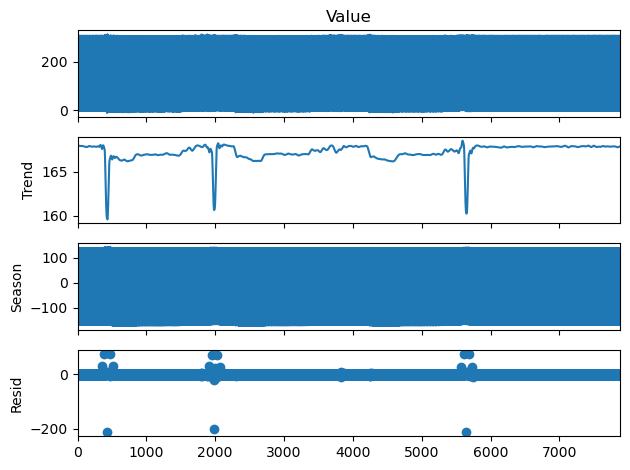

In [20]:
#https://medium.com/@richa.mishr01/anomaly-detection-in-seasonal-time-series-where-anomalies-coincide-with-seasonal-peaks-9859a6a6b8ba

stl = STL(df['Value'],period=40)
res = stl.fit()
fig = res.plot()

In [ ]:
#res.resid

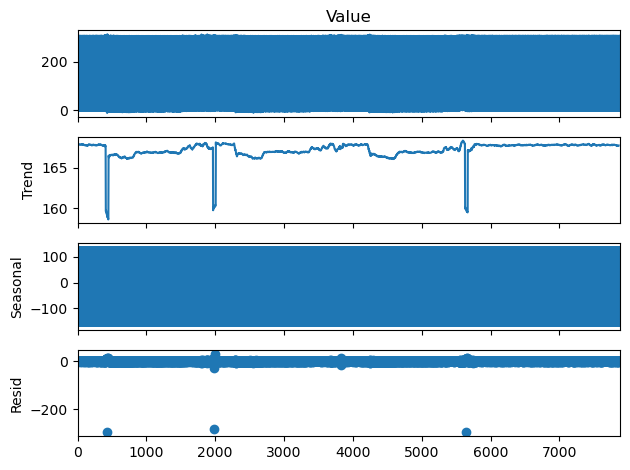

In [22]:
#seasonal_decomp = seasonal_decompose(y['VALUE'], model="additive")
#seasonal_decomp.plot();

result = seasonal_decompose((df['Value']), model='addaptive',period=40)#, freq=60)  #freq=7
result.plot()
pyplot.show()

In [24]:
sum(result.resid)
#res.resid

nan

In [57]:
null_counts = df.isna().sum()
if null_counts.sum() > 0:
    print("There are null values in the DataFrame.")
    print("Null value counts:\n", null_counts)
else:
    print("No null values found in the DataFrame.")



There are null values in the DataFrame.
Null value counts:
 level_0               0
index                 0
TIMESTAMP_S           0
Name                  0
Max. Variable         0
VALUE                 0
Fehlersimulation    610
dtype: int64


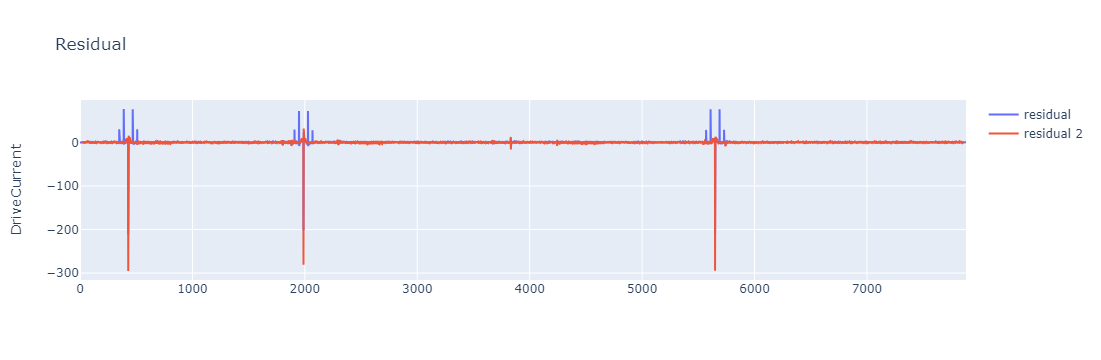

In [24]:
fig = go.Figure()

fig.add_scatter( x=df['Datetime'].index, y=res.resid, mode='lines', name="residual")
fig.add_scatter( x=df['Datetime'].index, y=result.resid, mode='lines', name="residual 2")
#fig.add_scatter( x=df['TIMESTAMP_S'].index, y=res.seasonal, mode='lines', name="seasonal")
#fig.add_scatter( x=df['TIMESTAMP_S'].index, y=y_outlier, mode='lines', name="outlier")
#fig.add_scatter( x=df['TIMESTAMP_S'].index, y=df['VALUE'], mode='lines', name="original")
fig.update_layout(
    
    yaxis_title='DriveCurrent',
    title='Residual',
    hovermode="x")
#fig.add_hline(y=957)
fig.show()

In [206]:
# calc outlier

In [207]:
#mu, sigma = y['VALUE'].mean(axis=0), y['VALUE'].std(axis=0)

#y_outlier = (y_outlier - mu) / sigma
#y_outlier

## FFT

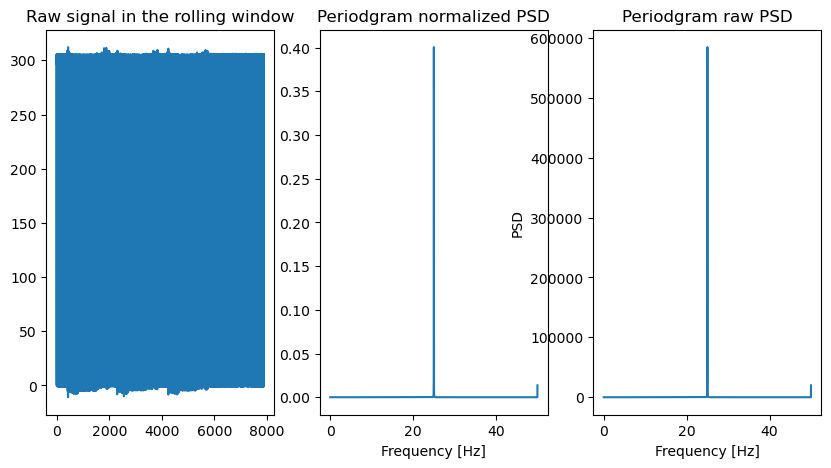

In [25]:
val = df['Value']
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.title('Raw signal in the rolling window')
plt.plot(val)
f, psd = periodogram(val,100, scaling='density')
psd_norm = psd / np.sum(psd)
plt.subplot(1,3,2)
plt.plot(f,psd_norm, label='normalized PSD')
plt.xlabel('Frequency [Hz]')
plt.title('Periodgram normalized PSD')
plt.subplot(1,3,3)
plt.plot(f,psd, label='raw PSD')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD')
plt.title('Periodgram raw PSD')
#plt.legend()
plt.show()

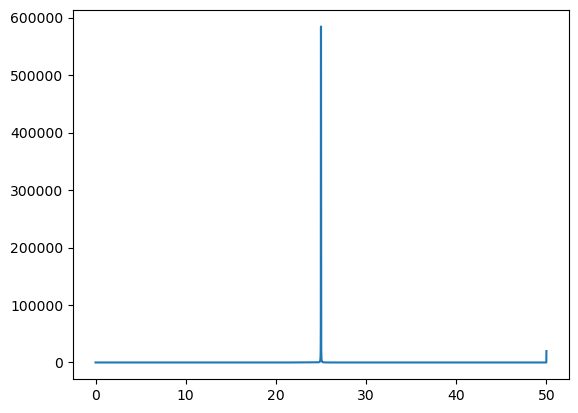

In [26]:
plt.plot(f,psd, label='raw PSD')

# Spec Resid calc scoring and changes points

In [38]:


# less than period
amp_window_size=int(len(X)/2)-1
# (maybe) as same as period
series_window_size=int(len(X)/2)-1
# a number enough larger than period
score_window_size=int(len(X)/2)-1

spec = anom.Silency(amp_window_size, series_window_size, score_window_size)
spec

In [42]:
y.values

array([[296.7 ],
       [305.39],
       [ 69.94],
       ...,
       [ -0.78],
       [296.54],
       [305.51]])

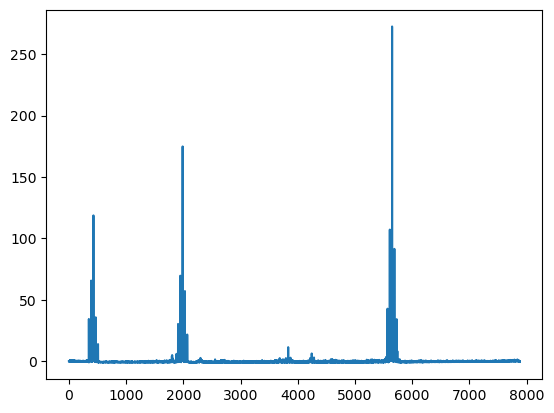

In [44]:

score = spec.generate_anomaly_score(res.resid.values)
#score = spec.generate_anomaly_score(y.values)
plt.plot(score)

df['score']=score

In [228]:
#counts, bins = np.histogram(y)

#plt.stairs(counts, bins)

In [229]:
#plt.hist(y,bins=100)

In [211]:
#y['VALUE'][1]

# calculate anoaml : 3* std. deviatoin or 99 percentile

In [119]:
#np.percentile(score, 99)

In [57]:

#standard_deviation = statistics.stdev(res.resid.values)*1.3
standard_deviation = statistics.stdev((df['Value']))
standard_deviation

136.0960647687206

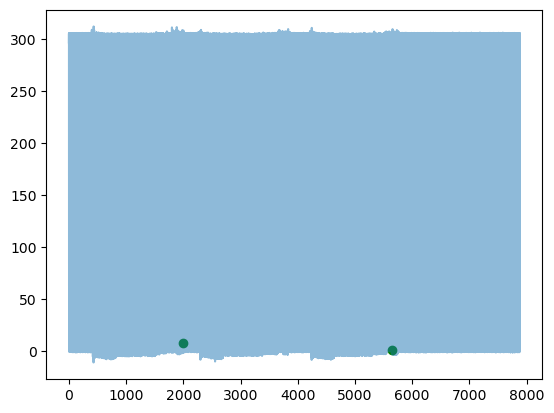

In [58]:


# Plot data with estimated anomalous points
plt.plot(y.values, alpha=0.5, label="observation")
#plt.plot(score, alpha=0.5, label="observation 2")
#index_changes = np.where(score > np.percentile(score, 99))[0]
index_changes = np.where(score >= standard_deviation)[0]
plt.scatter(index_changes, y.values[index_changes], c='green', label="change point")



In [214]:
#df=df.reset_index()

In [59]:
df['anomaly']=np.nan

for i in range(len(df)):
    if df['score'][i]>= standard_deviation:
        df['anomaly'][i]=df['Value'][i]
    else:
        df['anomaly'][i]=np.nan

In [60]:
#df

In [61]:
#index_changes

In [62]:
#y.values[index_changes]

In [63]:
#y['VALUE'][index_changes]

## Plotting anomalies

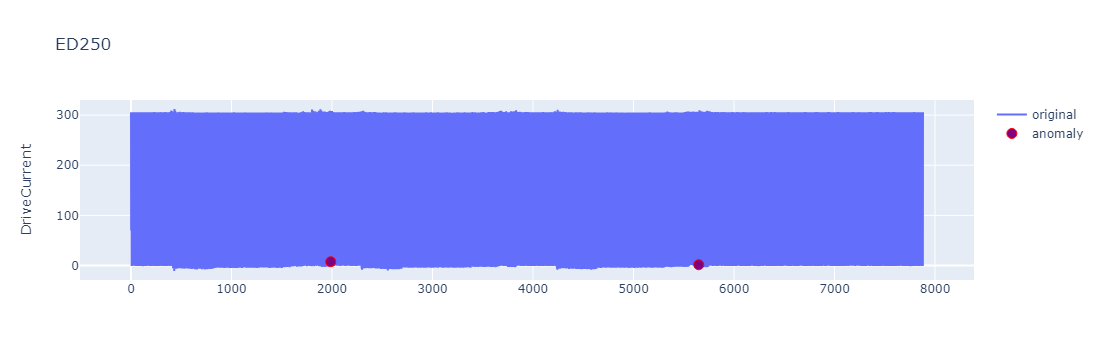

In [64]:
fig = go.Figure()

#fig.add_scatter( x=df['TIMESTAMP_S'], y=y, mode='lines', name="original")


fig.add_scatter( x=df['Datetime'].index, y=df['Value'], mode='lines', name="original")
#fig.add_scatter( x=X['TIMESTAMP_S'].index, y=score, mode='lines', name="score")
#fig.add_scatter( x=X.index, y=y, mode='lines', name="original")
#fig.add_scatter( x=index_changes, y=y['VALUE'][index_changes], mode='markers', name="anomaly",
fig.add_scatter( x=df['Datetime'].index, y=df['anomaly'], mode='markers', name="anomaly",
                marker=dict(
            color='purple',
            size=10,
            line=dict(
                color='Red',
                width=1
            )))

fig.update_layout(
    
    yaxis_title='DriveCurrent',
    title='ED250',
    hovermode="x")
#fig.add_hline(y=957)
fig.show()

In [144]:
#X['TIMESTAMP_S']

In [46]:
#X['index_changes']=index_changes